# customer churn

### biznesda uchraydigan eng dolzarb muammolardan biri bu mijoz noroziligini aniqlash

### online dokon haridorlari malumotlarini tahlil qilish orqali mijozning qolish qolmasligini bashorat qilishimiz mumkin 

## bu bizda binary classificationga togri keladi chunki mijoz qoladi yoki yoqligini aniqlashimiz kerak

# kutubxonalar

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

# data haqida malumotlar

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# vizualization

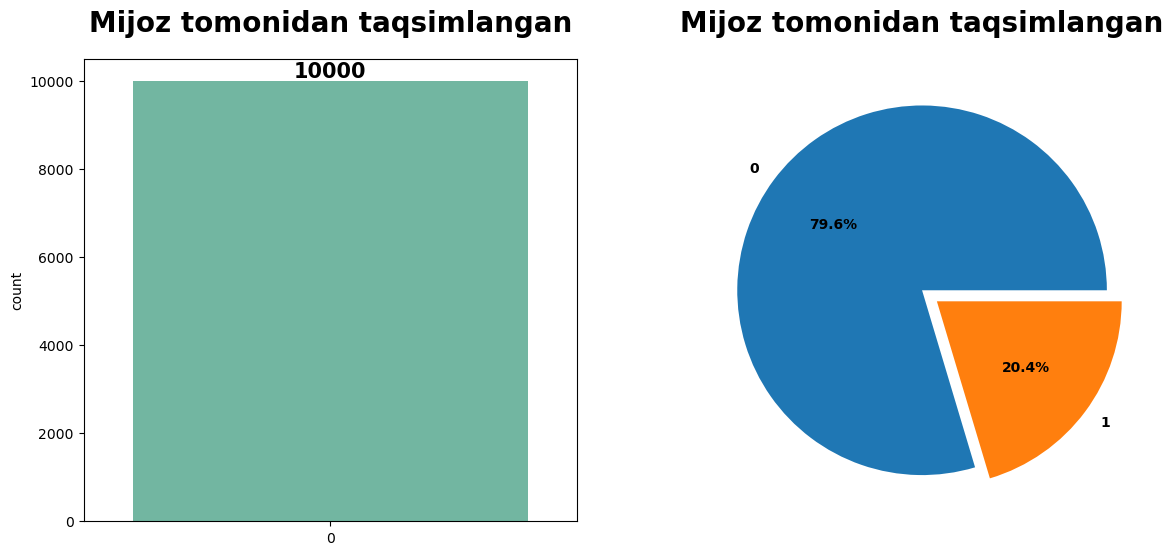

In [7]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Mijoz tomonidan taqsimlangan",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Mijoz tomonidan taqsimlangan",fontweight="black",size=20,pad=20)
plt.show()

# ML

In [8]:
df = pd.get_dummies(data=df)

In [9]:
X = df.drop('Churned', axis=1)
y = df['Churned']

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train,y_train)

RandomForestClassifier()

# modelni baholash

In [13]:
y_pred = forest_clf.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))
print('accuracy_score: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.85      0.42      0.57       405

    accuracy                           0.87      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.87      0.87      0.85      2000

accuracy_score:  0.8685


In [15]:
param_grid = {'max_depth': [3,4,5,6],
              'min_samples_split':[3,4,5,6],
              'min_samples_leaf': [3,4,5,6],
              'n_estimators': [50,90,100],
              'criterion': ['gini', 'entropy']}

In [17]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, n_jobs=1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [50, 90, 100]})

In [18]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [19]:
grid_search.score(x_train,y_train)

0.796